# Machine Learning Foundations Homework 2

Website of **Machine Learning Foundations** by Hsuan-Tien Lin: https://www.csie.ntu.edu.tw/~htlin/mooc/.

## Question 1

Question 1-2 are about noisy targets.

Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in approximating a deterministic target function $f$ (both $h$ and $f$ outputs $\{-1, +1\}$. If we use the same $h$ to approximate a noisy version of $f$ given by 

$$
P(\mathbf{x}, y) = P(\mathbf{x})P(y|\mathbf{x}) \\
P(y | \mathbf{x})=\left\{\begin{array}{ll}\lambda & y=f(\mathbf{x}) \\ 1-\lambda & \text { otherwise }\end{array}\right.
$$

What is the probability of error that $h$ makes in approximating the noisy target $y$?

### Ans: $\lambda \mu+(1-\lambda)(1-\mu)$

### Explanation

A noisy version of $f$ means $y$ will have opposite sign as $f(\mathbf{x})$. The probability of $y$ being noisy, i.e., $y\neq f(\mathbf{x})$, is $1-\lambda$ and $h$ will make an error in this case if and only if $h(\mathbf{x}) = f(\mathbf{x})$, which has probability $1-\mu$, multiply these two probablity to get $(1-\lambda)(1-\mu)$. On the other hand, if $y$ is not noisy, i.e., $y=f(\mathbf{x})$, then $h$ will make an error if and only if $h(\mathbf{x})\neq f(\mathbf{x})$, so the probability is $\lambda\mu$. Adding these two probabilities together we will obtain the answer.

## Question 2

Following Question 1, with what value of $\lambda$ will the performance of $h$ be independent of $\mu$?

(i) 1

(ii) one of the other choices

(iii) 0.5

(iv) 0

(v) 0 or 1

### Ans: (iii) 0.5

### Explanation

To make $\lambda \mu+(1-\lambda)(1-\mu)$ irrelevant to $\mu$, we must eliminate $\mu$. $\lambda=0.5$ will work.

## Question 3

Question 3-5 are about generalization error, and getting the feel of the bounds numerically. Please use the simple upper bound $N^{d_{\mathbf{vc}}}$ on the growth function $m_{\mathcal{H}}(N)$, assuming that $N \ge 2$ and $d_{\mathbf{vc}} \ge 2$.

For an $\mathcal{H}$ with $d_{\mathbf{vc}}=10$, if you want $95$% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that VC generalization bound predicts?

(i) 500,000

(ii) 480,000

(iii) 420,000

(iv) 440,000

(v) 460,000

### Ans: (v) 460,000

Recall vc bound is $4(2N)^{d_{\mathbf{vc}}}\text{exp}(-\frac{1}{8}\epsilon^2N)$.

In [1]:
import numpy as np

def vc_bound(N, d_vc, epsilon):
    """
    VC bound for "bad event", i.e., the probability of |E_in - E_out| > epsilon.
    
    Args:
        N: int, sample size
        d_vc: int, vc dimension of the given hypothesis set H
        epsilon: double, error
    Returns:
        VC bound 
    """
    return 4 * (2 * N) ** d_vc * np.exp(-1/8 * epsilon ** 2 * N)


In [2]:
N = 10_000
d_vc = 10
epsilon = 0.05
delta = 0.05  # delta = 1 - confidence

while vc_bound(N, d_vc, epsilon) > delta:
    N += 10_000

In [3]:
N

460000

## Question 4

There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1-\delta$. Fix $d_{\mathbf{vc}}=50$ and $\delta=0.05$ and plot these bounds as a function of $N$. Which bound is the tightest (smallest) for very large $N$, say $N=10,000$? Note that Devroye and Parrondo & Van den Broek are implicit bounds in $\epsilon$.

(i) Original VC bound: $\epsilon \leq \sqrt{\frac{8}{N} \ln \frac{4 m_\mathcal{H}(2 N)}{\delta}}$

(ii) Rademacher Penalty Bound: $\epsilon \leq \sqrt{\frac{2 \ln (2 N m_\mathcal{H}(N))}{N}}+\sqrt{\frac{2}{N} \ln \frac{1}{\delta}}+\frac{1}{N}$

(iii) Parrondo and Van den Broek: $\epsilon \leq \sqrt{\frac{1}{N}\left(2 \epsilon+\ln \frac{6 m_ \mathcal{H}(2 N)}{\delta}\right)}$

(iv) Devroye: $\epsilon \leq \sqrt{\frac{1}{2 N}\left(4 \epsilon(1+\epsilon)+\ln \frac{4 m_\mathcal{H}\left(N^{2}\right)}{\delta}\right)}$

(v) Variant VC bound: $\epsilon \leq \sqrt{\frac{16}{N} \ln \frac{2 m_\mathcal{H}(N)}{\sqrt{\delta}}}$

In [4]:
def origin_vc_bound(N, delta, d_vc):
    return np.sqrt(8/N * np.log((4. * (2 * N) ** d_vc)/delta))

def rademacher_penalty_bound(N, delta, d_vc):
    return np.sqrt(2/N * np.log(2.*N * N ** d_vc)) + np.sqrt(2/N * np.log(1./delta)) + 1/N

def parrondo_and_Van(N, delta, d_vc):
    def Delta(N, delta, d_vc):
        return 4/N**2 + 4/N * (np.log(6/delta) + d_vc * np.log(2 * N))
#     print("Delta=", Delta(N, delta, d_vc))
    return 1/N + 1/2 * np.sqrt(Delta(N, delta, d_vc)) 

def devroye(N, delta, d_vc):
    def Delta(N, delta, d_vc):
        return 4/N**2 + (1 - 2/N) * 2/N * (np.log(4/delta) + 2 * d_vc * np.log(N))
#     print("Delta=", Delta(N, delta, d_vc))
    return (2/N + np.sqrt(Delta(N, delta, d_vc))) / (2 * (1 - 2/N))

def variant_vc_bound(N, delta, d_vc):
    return np.sqrt(16/N * np.log(2. * N ** d_vc / np.sqrt(delta)))


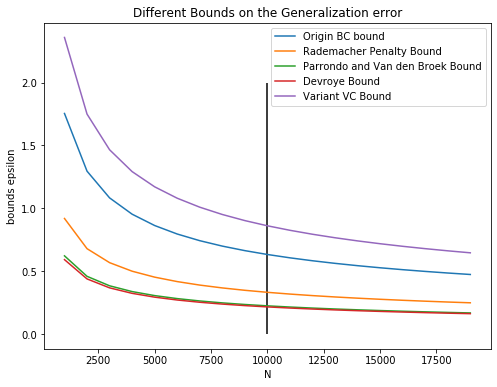

In [5]:
import matplotlib.pyplot as plt

d_vc = 50
delta = 0.05

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
Ns = range(1_000, 20_000, 1_000)

ax.plot(Ns, [origin_vc_bound(N, delta, d_vc) for N in Ns], label='Origin BC bound')
ax.plot(Ns, [rademacher_penalty_bound(N, delta, d_vc) for N in Ns], label='Rademacher Penalty Bound')
ax.plot(Ns, [parrondo_and_Van(N, delta, d_vc) for N in Ns], label='Parrondo and Van den Broek Bound')
ax.plot(Ns, [devroye(N, delta, d_vc) for N in Ns], label='Devroye Bound')
ax.plot(Ns, [variant_vc_bound(N, delta, d_vc) for N in Ns], label='Variant VC Bound')

ax.set_title("Different Bounds on the Generalization error")
ax.set_xlabel("N")
ax.set_ylabel("bounds epsilon")
ax.vlines(x=10000, ymin=0, ymax=2)
ax.legend();

In [6]:
devroye(10000, 0.05, 50)

0.21522804980824667

In [7]:
parrondo_and_Van(10000, 0.05, 50)

0.2236982936807856

As can be seen from the picture, Devroye bound is the tightest (although it is very close to Parrondo and Van den Broek bound).

## Question 5

Continuing from Question 4, for small $N$, say $N=5$, which bound is the tightest (smallest)?

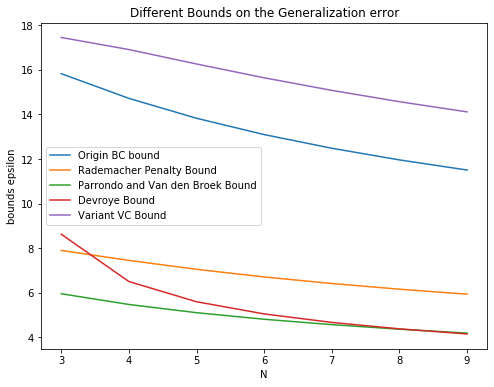

In [8]:
d_vc = 50
delta = 0.05

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
Ns = range(3, 10, 1)

ax.plot(Ns, [origin_vc_bound(N, delta, d_vc) for N in Ns], label='Origin BC bound')
ax.plot(Ns, [rademacher_penalty_bound(N, delta, d_vc) for N in Ns], label='Rademacher Penalty Bound')
ax.plot(Ns, [parrondo_and_Van(N, delta, d_vc) for N in Ns], label='Parrondo and Van den Broek Bound')
ax.plot(Ns, [devroye(N, delta, d_vc) for N in Ns], label='Devroye Bound')
ax.plot(Ns, [variant_vc_bound(N, delta, d_vc) for N in Ns], label='Variant VC Bound')

ax.set_title("Different Bounds on the Generalization error")
ax.set_xlabel("N")
ax.set_ylabel("bounds epsilon")
ax.legend();


As can be seen from the picture, when $N$ is small, Parrondo and Van den Broek bound is the tightest.

## Question 6

In Question 6-11, you are asked to play with the growth function or VC-dimension of some hypothesis sets.

What is the growth function $m_{\mathcal{H}}(N)$ of "positive-and-negative intervals on $\mathbb{R}$"? The hypothesis set $\mathcal{H}$ of "positive-and-negative intervals" contains the functions which are +1 within an interval $[\ell, r]$ and -1 elsewhere, as well as the functions which are -1 within an interval $[\ell, r]$ and +1 elsewhere. For instance, the hypothesis $h_{1}(x)=\operatorname{sign}(x(x-4))$ is a negative interval with -1 within $[0, 4]$ and +1 elsewhere, and hence belongs to $\mathcal{H}$. The hypothesis $h_{2}(x)=\operatorname{sign}((x+1)(x)(x-1))$ contains two positive intervals in $[-1, 0]$ and $[1, \infty)$ and hence does not belong to $\mathcal{H}$.

### Ans: $N^2 - N + 2$

### Explanation

First, we can choose interval ends from $N+1$ spots to form either positive or negative intervals. Note that cases of all **'o'** or **'x'** are included in $2{N+1\choose{2}}$ and count exactly once: positive interval containing all $N$ points and negative interval containing all $N$ points. 

However, there still exist replicates. 

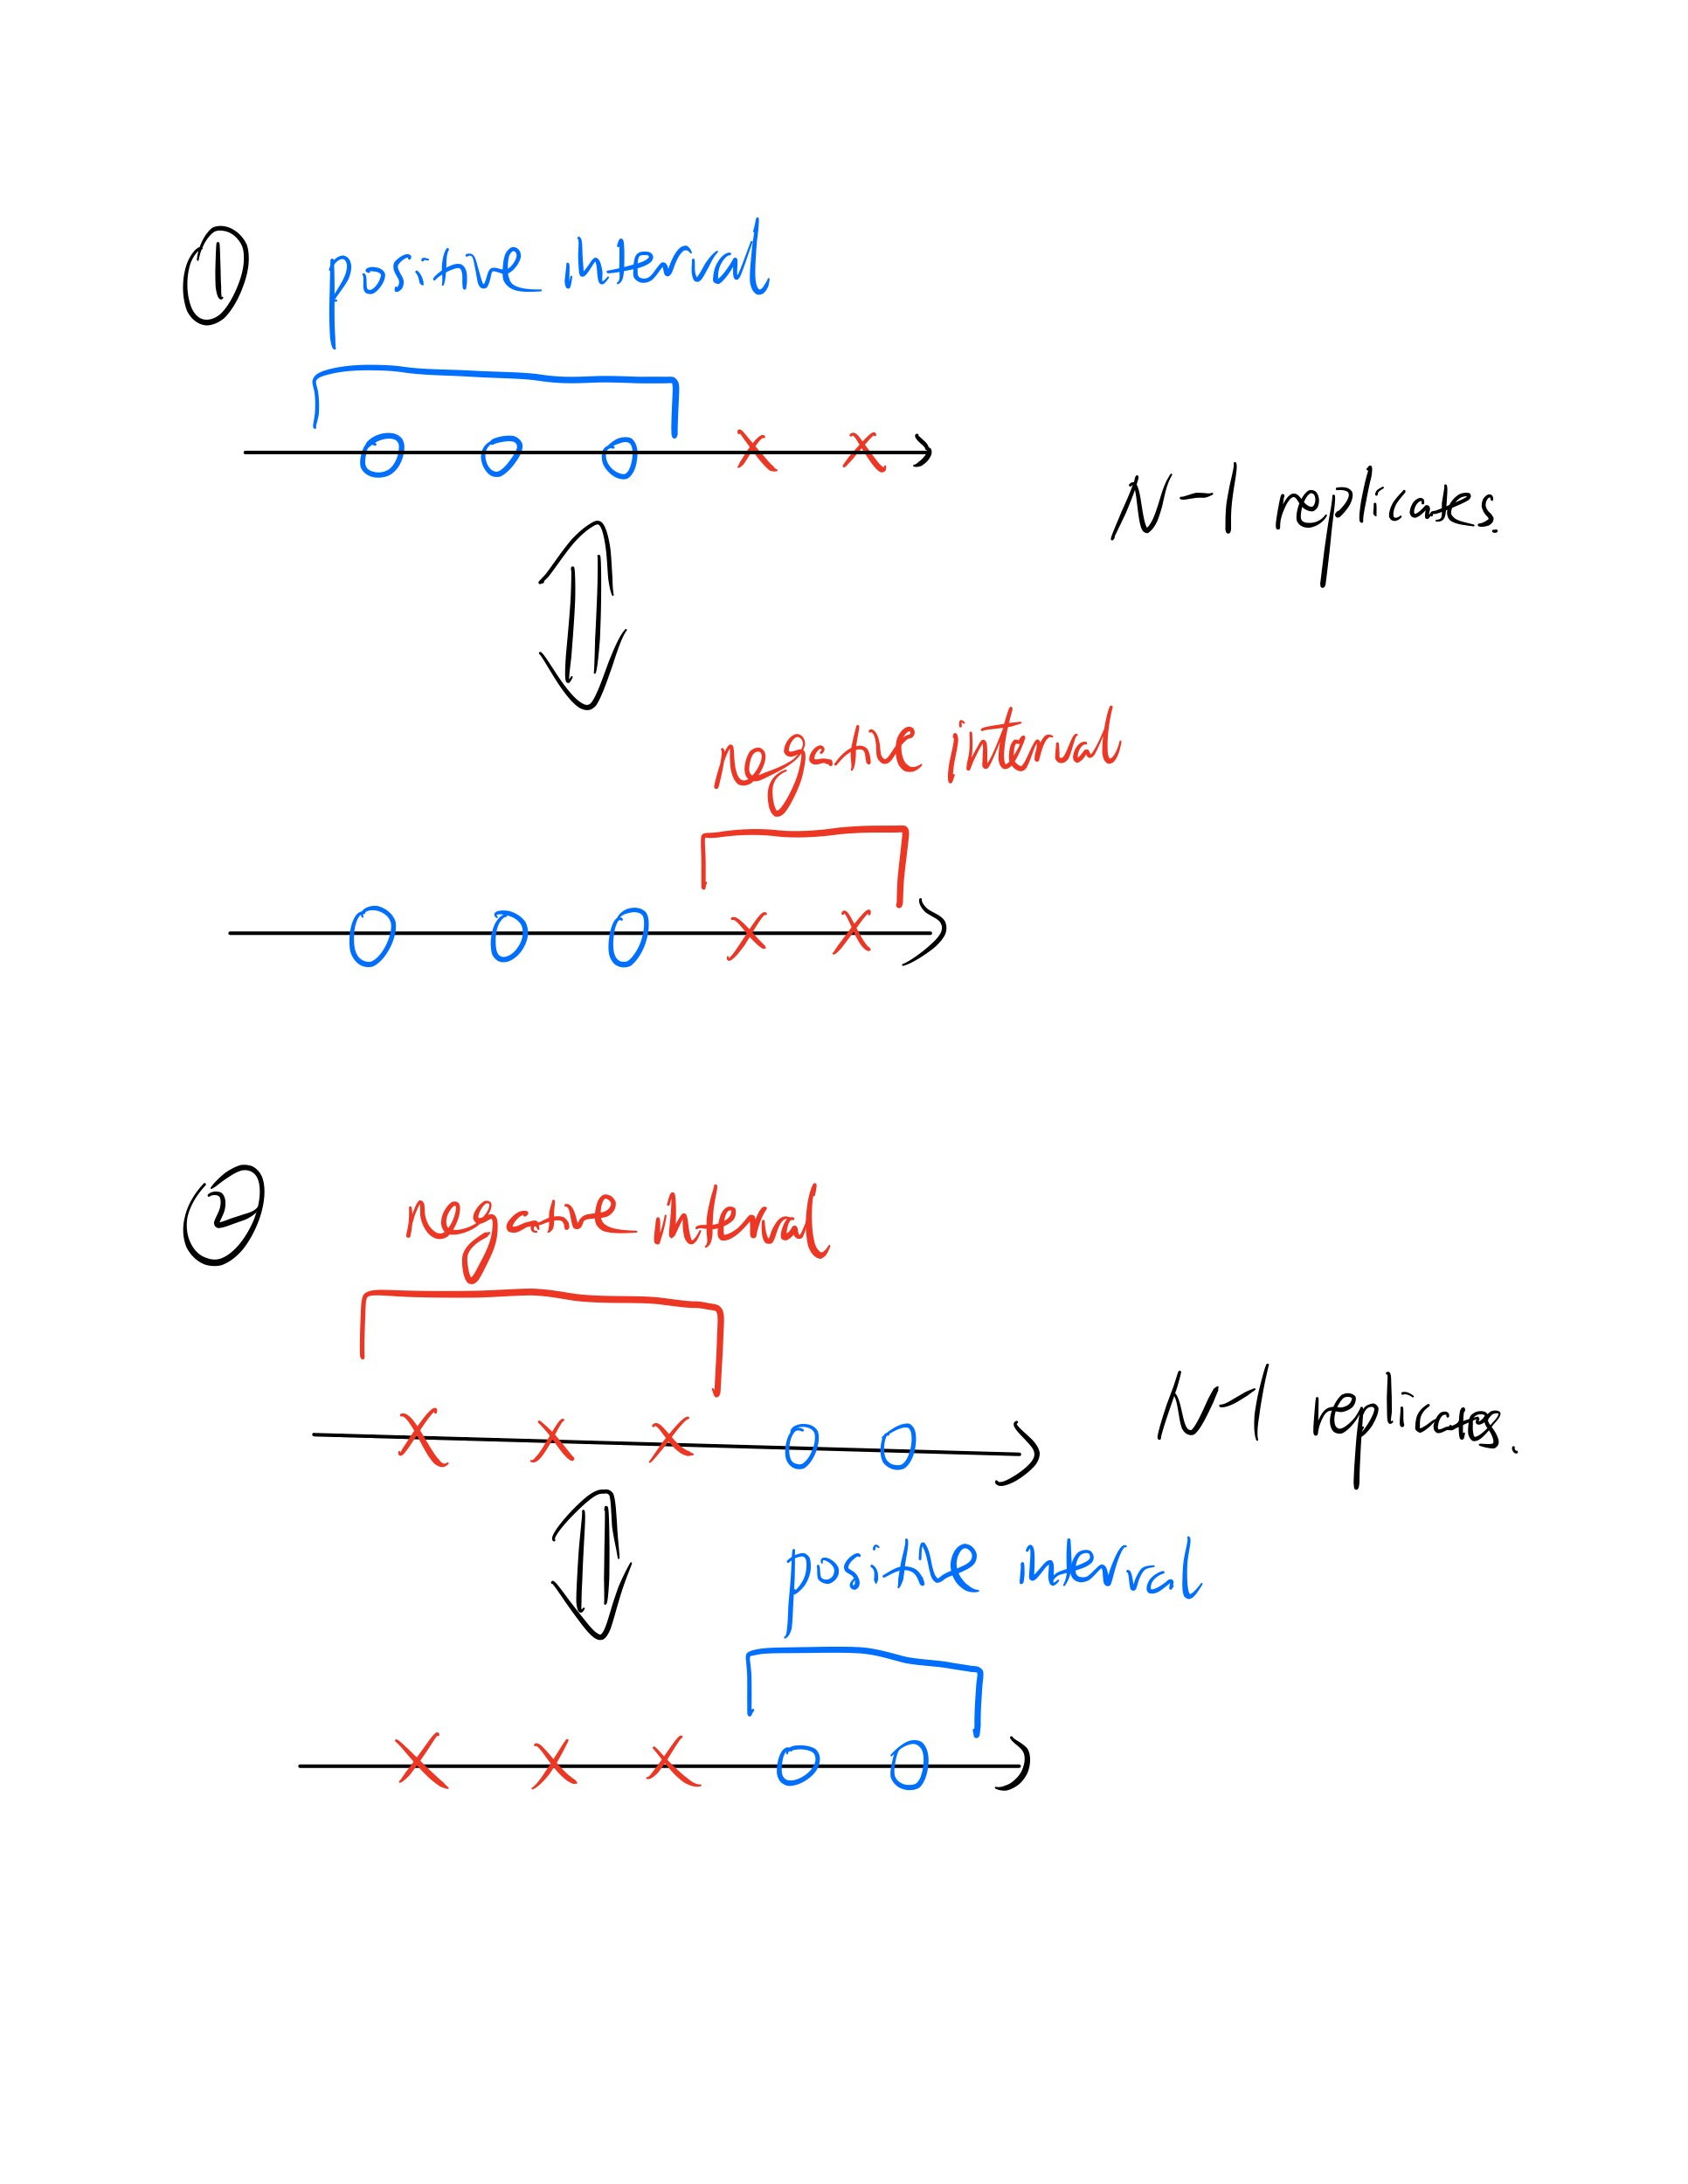

Hence, the result is $2{N+1\choose{2}} - (N-1) - (N-1) = N^2 - N + 2$.

## Question 7

Continuing from the previous problem, what is the VC-dimension of the "positive-and-negative intervals on $\mathbb{R}$"?

### Ans: 3, which is the largest number of inputs that can be shattered. 

## Question 8

What is the growth function $m_{\mathcal{H}}(N)$ of "positive donuts in $\mathbb{R}^2$"? The hypothesis set $\mathcal{H}$ of "positive donuts" contains hypotheses formed by two concentric circles centered at the origin. In particular, each hypothesis is +1 within a "donut" region $a^{2} \leq x_{1}^{2}+x_{2}^{2} \leq b^{2}$ and -1 elsewhere. Without loss of generality, we assume $0<a<b<\infty$.

### Ans: ${N+1\choose{2}}+1$

### Explanation

If we think carefully, then we can recognize that this is similar to the positive interval case in $\mathbb{R}$: $N$ points corresponds to $N$ radiuses and we need to choose 2 radiuses from $N+1$ spots. Finally add the all '**x**' case. 

## Question 9

Consider the "polynomial discriminant" hypothesis set of degree $D$ on $\mathbb{R}$, which is given by
$$
\mathcal{H}=\left\{h_{\mathrm{c}}\; \bigg| \; h_{\mathrm{c}}(x)=\operatorname{sign}\left(\sum_{i=0}^{D} c_{i} x^{i}\right)\right\}
$$

What is the VC-Dimension of such an $\mathcal{H}$?

### Ans: $D+1$

### Explanation

$\mathcal{H}$ is exactly a $D$-D perceptrons since it's a linear separator in $D$ dimensions, and we have learnt the VC dimension of $d$-D perceptron is $d+1$.

## Question 10

Consider the "simplified decision trees" hypothesis set on $\mathbb{R}^d$, which is given by

$$
\begin{aligned}
&\mathcal{H}=\left\{h_{\mathfrak{t}, \mathbf{S}} | h_{\mathfrak{t}, \mathbf{S}}(\mathbf{x})=2[\mathbf{v} \in S]-1, \text { where } v_{i}=\left[x_{i}>t_{i}\right]\right.\\
&\text { S a collection of vectors in }\left.\{0,1\}^{d}, \mathbf{t} \in \mathbb{R}^{d} \quad\right\}
\end{aligned}
$$

That is, each hypothesis makes a prediction by first using the $d$ thresholds $t_i$ to locate $\mathbf{x}$ to be within one of the $2^d$ hyper-rectangular regions, and looking up $\mathbf{S}$ to decide whether the region should be +1 or -1. What is the VC-dimension of the "simplified decision trees" hypothesis set?

### Ans: $2^d$

### Explanation

Consider a simple case: $d=2$, then $x$, $t$, $v$ are all vectors in $\mathbb{R}^2$. 

Since hypothesis $h$ is related to $t$ and $S$, suppose $t=(t_1, t_2)$ is given. It divides the whole plane into 4 partitions. Suppose we have 4 points (like the image below), each of which is in one particular partition and we ask ourselves: how will $h$ classify them, **'x'** or **'o'**?

Well, it depends on what $S$ looks like. If $S$ contains all 4 possible vectors: $(0, 0), (0, 1), (1, 0), (1, 1)$, then what will the first point be? Because the $x_1$ and $x_2$ components of the first point is less than $t_1$ and $t_2$, respectively, its $v$ will be $(0, 0)$ and $(0, 0)$ **IS IN** $S$! So $v\in S$ and $h_{\mathfrak{t}, \mathbf{S}}(\mathbf{x})$ will be $1$, which means the first point will be classified as **'o'**.

Similarlly, all the other three points will be classified as **'o'** since $(0, 1), (1, 0), (1, 1)$ are all in our set $S$. Now, we have obtained one dichotomy: all **'o'**s.

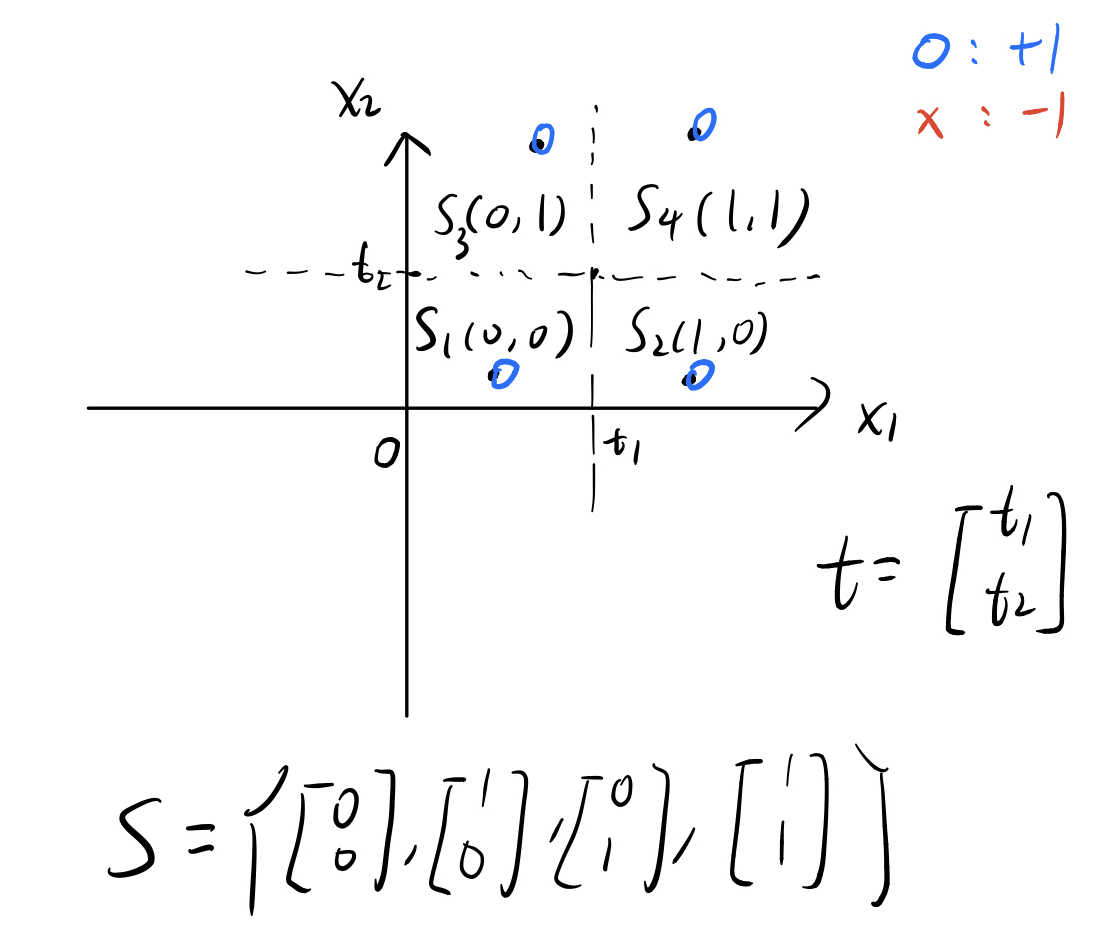

Well, how do we get other dichotomies? Let's say change the third point to **'x'** and leave the other three the same. In this case, we can simply take $(1, 1)$ out of our $S$, and the $v$ of the third point will not be in $S$ again, which means the point will be an **'x'**!

Proceeding in this manner, we can obtain all 16 possible dichotomies, which implies these 4 points are shattered by our hypothesis set. 

What about 5 points? Well, then at least two of these points will be in the same partition and hence must have the same shape. So any 5 points cannot be shattered. The VC dimension of this hypothesis set is $4=2^d$.

In the more general case, the above argument still applies and thus we can conclude the VC dimension of this hypothesis set is $2^d$.



## Question 11

Consider the "triangle waves" hypothesis set on $\mathbb{R}$, which is given by 

$$
\mathcal{H}=\left\{h_{\alpha}\left|h_{\alpha}(x)=\operatorname{sign}(|(\alpha x) \bmod 4-2|-1), \alpha \in \mathbb{R}\right\}\right.
$$

Here $(z \bmod 4)$ is a number $z-4k$ for some integer $k$ such that $z-4k \in [0, 4)$. For instance, $(11.26 \bmod 4$ is $3.26$, and $(-11.26 \bmod 4)$ is $0.74$.

What is the VC-Dimension of such an $\mathcal{H}$?


### Ans: $\infty$

### Explanation: A Pictorial Proof ^_^

In [9]:
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider
import ipywidgets as widgets
from tqdm.notebook import tqdm

In [10]:
class DynamicWave(object):
    
    def __init__(self, wave, pts):
        self.wave = wave
        self.pts = []
        self.n = len(pts)
        self.dychotomies = set()
        dychotomy = ""
        for pt in pts:
            self.pts.append(pt)
            pt.wave = self.wave
            dychotomy += pt.get_shape()
            
        self.dychotomies.add(dychotomy)
    
    def dynamic(self, new_alpha, draw=True):
        
        self.wave.change_alpha(new_alpha)
        
        # After changing alpha, dynamically change the shape of points as well
        dychotomy = ""
        for pt in self.pts:
            pt.shape_it()
            dychotomy += pt.get_shape()
        if dychotomy not in self.dychotomies:
            self.dychotomies.add(dychotomy)
            
        get_all_dychotomies = (len(self.dychotomies) == 2 ** self.n)
        
        if draw:
            # Redraw the picture
            self.wave.ax.clear()
            self.wave.draw()
            for pt in self.pts:
                pt.draw()
            self.wave.ax.legend(loc="lower left")
            self.wave.fig.show()
            if not get_all_dychotomies:
                print(f"Current have {len(self.dychotomies)} dychotomies: {self.dychotomies}")
            
        if get_all_dychotomies:
            print(f"We have get all 2^{self.n} dichotomies!")
            print(f"{self.dychotomies}")
            
        return get_all_dychotomies

        

class Wave(object):
    
    def __init__(self, alpha, start, end, fig=None, ax=None):
        self.alpha = alpha
        self.fig = fig
        self.ax = ax
        self.start = start
        self.end = end
    
    def change_alpha(self, new_alpha):
        self.alpha = new_alpha
    
    def draw(self):
        xs = np.linspace(self.start, self.end, 1000)
        ys = [self.wave(x) for x in xs]

        ax.plot(xs, ys)
        ax.hlines(y=0, xmin=self.start, xmax=self.end)      # Add x-axis
        ax.vlines(x=0, ymin=-1.2, ymax=1.2)                 # Add y-axis
    
    def wave(self, x):
        return self.sign(abs((self.alpha * x) % 4 - 2) - 1)
    
    @staticmethod
    def sign(x):
        return 1 if x > 0 else -1

class Point(object):
    
    def __init__(self, wave, x):
        self.wave = wave
        self.x = x
        self.shape = None
        self.shape_it()
    
        
    def shape_it(self):
        if self.wave.wave(self.x) == 1:
            self.shape = 'o'
        else:
            self.shape = 'x'
            
    def get_shape(self):
        return self.shape
    
    def draw(self):
        ax = self.wave.ax
        if self.get_shape() == 'o':
            ax.plot(self.x, 0, color='blue', marker='o', label="+1")
        elif self.get_shape() == 'x':
            ax.plot(self.x, 0, color='red', marker='x', label="-1")
        else:
            raise Exception("The shape has been changed to neither 'o' nor 'x', please check it!")

<IPython.core.display.Javascript object>


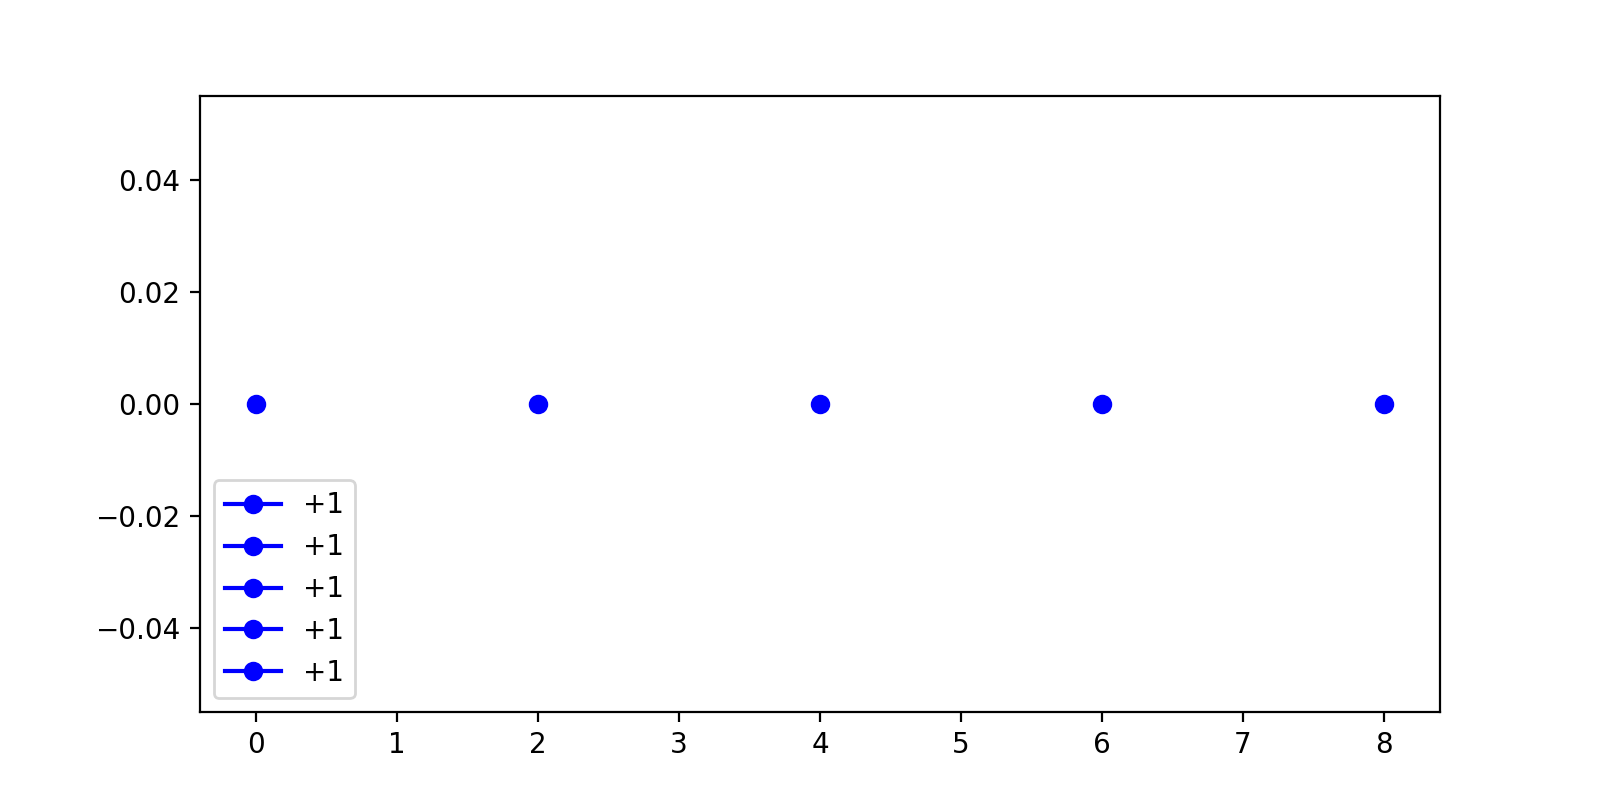

interactive(children=(FloatSlider(value=1e-05, description='new_alpha', max=1000.0, min=1e-05, step=1e-07), Ch…

In [11]:
# use the notebook backend
%matplotlib notebook 

"""
NOTE1: Using random points can speed up finding all dychotomies
       Moreover, if we increase the range of the points, we can speed up too!
       e.g. pts = [Point(w1, x) for x in 1e7*np.random.rand(5)]
       
NOTE2: Uniformly distributed points have hard time finding all dychotomies. 
       e.g. pts = [Point(w1, x) for x in np.linspace(0, 2, 4)] 
       
       After running a few numerical experiments, I guess it's even impossible
       to find all dychotomies in this case. If you have any idea, please tell me
       and we can discuss about it.
"""


fig, ax = plt.subplots(1, 1, figsize=(8, 4))

x_start = -8
x_end = 8

w1 = Wave(1, x_start, x_end, fig, ax)
pts1 = [Point(w1, x) for x in np.linspace(0, 8, 5)]

dw = DynamicWave(w1, pts1)
interact(dw.dynamic, new_alpha=FloatSlider(min=1e-5, max=1000, step=1e-7));


In [12]:
"""
Try different alpha's  ^_^
"""

x_start = -8
x_end = 8

w2 = Wave(alpha=1, start=x_start, end=x_end)
pts2 = [Point(w2, x) for x in 1000*np.random.rand(12)]

dw2 = DynamicWave(w2, pts2)

get_all_dychotomies = False

# Set alpha from 0 to 1000, totally 10^7 different values
for alpha in tqdm(np.linspace(0, 1000, 1e7)):
    get_all_dychotomies = dw2.dynamic(alpha, draw=False)
    if get_all_dychotomies:
        break

if get_all_dychotomies:
    print("Cheers!")
else:
    print("failed...")

We have get all 2^12 dichotomies!
{'xoooxxooooox', 'xxxxxoxoxxxx', 'oxoxoooxoxox', 'ooxooxxxoxoo', 'xooooxoxxxox', 'xoxxooxooxxx', 'xxoooxoooxxx', 'xxxxxoxoxoxo', 'xooxxooxxooo', 'xooxxxxoxxxx', 'oxooooxxooxx', 'xxoxxxoxoxoo', 'xxxoxxoxoxxx', 'ooooxoooxooo', 'oxooxoxxooxx', 'xoxxoooxxxxx', 'oxooxxxxooox', 'oooooxooxxxx', 'oxxooxxooxxx', 'oxxxooxxoxxo', 'xxoxooxxxoox', 'xoxoooxooxxo', 'oxxxxxooxoox', 'oxxoxoxxxooo', 'xoxxooxoxoxo', 'oxooooooxxox', 'ooxoxxxxxxxo', 'oxooooxoooxo', 'oxoxxoooooxx', 'xxxooxooxoxo', 'oxooxxoxxoox', 'oxoxooxxoooo', 'oxooxoooooxo', 'xxooxxxoxxoo', 'ooxoxoxxooxx', 'ooooxxooooxx', 'oooxoooxxxxo', 'xoxxooxoxoxx', 'xoxooxoooxxx', 'xooxoxxooxox', 'oxxxooxxxoxx', 'xxoxooxxxxoo', 'oooxxxooooxo', 'xooxooxxxxox', 'oxxxxxoxxxoo', 'oooxoxoooxxx', 'oxoxxooxxoxo', 'xxoxoxoxxxoo', 'xoxooxoxooxo', 'oxxxooxxxxxx', 'oxxooooooxoo', 'xoxoooxoxoox', 'oxooxxoxxxxx', 'oxooxoxxxxox', 'xoooooooxxoo', 'xoxxooooxxxo', 'xoxooxoxxoox', 'xoxoxxoooxxo', 'ooxoxoxooooo', 'oxoxoooxoxoo', 'oooo

In [13]:
# Starting code

# def waves(alpha, x):
#     return sign(abs((alpha * x) % 4 - 2) - 1)

# def sign(x):
#     return 1 if x > 0 else -1

# def draw_waves(alpha, ax):
#     xs = np.linspace(-8, 8, 1000)
#     ys = [waves(alpha, x) for x in xs]
    
#     ax.plot(xs, ys)
#     ax.hlines(y=0, xmin=-8, xmax=8)      # Add x-axis
#     ax.vlines(x=0, ymin=-1.2, ymax=1.2)  # Add y-axis
    
# def draw_points(alpha, ax):
#     pts = [3.5, 4.5]
#     shapes = []
#     for pt in pts:
#         if waves(alpha, pt) == 1:
#             shapes.append('o')
#         else:
#             shapes.append('x')
#     for pt, shape in zip(pts, shapes):
#         if shape == 'o':
#             ax.plot(pt, 0, 'o')
#         else:
#             ax.plot(pt, 0, 'x')

# draw_waves(1, ax)
# draw_points(1, ax)

# p1 = Point(w1, 3.5)
# p2 = Point(w1, 4.5)
# pts = [p1, p2]

## Question 12

In Question 12-15, you are asked to verify some properties or bounds on the growth function and VC-dimension.

Which of the following is an upper bound of the growth function $m_{\mathcal{H}}(N)$ for $N \geq d_{v c} \geq 2$?

(i) $2^{d_{v c}}$

(ii) $\sqrt{N^{d_{v c}}}$

(iii) $m_{\mathcal{H}}\left(\left\lfloor\frac{N}{2}\right\rfloor\right)$

(iv) $\min _{1 \leq i \leq N-1} 2^{i} m_{\mathcal{H}}(N-i)$

(v) none of the other choices

### Ans: (iv)

### Explanation

(i): $2^{d_{vc}}$ contains no $N$ part and is constant as $N$ grows, but our growth function $m_{\mathcal{H}}$ typically tends to infinity as $N$ increases and hence $2^d_{vc}$ cannot be an upper bound.

(ii): Consider the 1D perceptron. In this case $d_{vc}$ is 2 and $m_{\mathcal{H}}(N) = 2N$. Comparing to $\sqrt{N^2}=N$, we see $\sqrt{N^{d_{v c}}}$ cannot be an upper bound.

(iii): Growth function $m_{\mathcal{H}}$ is non-decreasing and $\left\lfloor\frac{N}{2}\right\rfloor$ is less than $N$ for $N \ge 2$, so this can not be an upper bound.

(v): Every time we put one more point, we can, at most,  double our dichotomies, so $m_{\mathcal{H}}(N) \le 2 m_{\mathcal{H}}(N-1)$. Repeat $i$ times we see $m_{\mathcal{H}}(N) \le 2^i m_{\mathcal{H}}(N-i)$ for every $i$. Therefore, their minimum value is an upper bound for $m_{\mathcal{H}}(N)$.

## Question 13

Which of the following is not a possible growth function $m_{\mathcal{H}}(N)$ for some hypothesis set?

(i) $N^{2}-N+2$

(ii) $2^{\lfloor\sqrt{N}\rfloor}$

(iii) $2^{N}$

(iv) $N$

### Ans: (ii)

### Explanation

If $m_{\mathcal{H}}(N) = 2^{\lfloor\sqrt{N}\rfloor}$, then $d_{vc} = 1$ since $m_{\mathcal{H}}(2) = 2 \lt 2^2=4$, thus $m_{\mathcal{H}}(N)$ must be bounded by $N^{d_{vc}} = N$, which is false. 

## Question 14

For hypothesis sets $\mathcal{H}_{1}, \mathcal{H}_{2}, \ldots, \mathcal{H}_{K}$ with finite, positive VC dimensions $d_{v c}\left(\mathcal{H}_{k}\right)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound on the VC dimension of the **intersection** of the sets: $d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right)$? (The VC dimension of an empty set or a singleton set is taken as zero)

(i) $\min \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right) \leq \max \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K}$

(ii) $0 \leq d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right) \leq \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(iii) $\min \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right) \leq \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(iv) $0 \leq d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right) \leq \min \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K}$

(v) $0 \leq d_{v c}\left(\bigcap_{k=1}^{K} \mathcal{H}_{k}\right) \leq \max \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K}$

### Ans: (iv)

### Explanation

The VC dimension of the intersection cannot exceed each of the individual one's. Moreover, if the intersection is empty, then the VC dimension is zero.

## Question 15

For hypothesis sets $\mathcal{H}_{1}, \mathcal{H}_{2}, \ldots, \mathcal{H}_{K}$ with finite, positive VC dimensions $d_{v c}\left(\mathcal{H}_{k}\right)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound on the VC dimension of the **union** of the sets: $d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right)$?

(i) $\min \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(ii) $0 \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(iii) $\max \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(iv) $0 \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq K-1+\sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

(v) $\max \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq K-1+\sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$

### Ans: (v)

### Explanation

The VC dimension of the union is at least as large as each individual one's, thus $\max \left\{d_{v c}\left(\mathcal{H}_{k}\right)\right\}_{k=1}^{K} \leq d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right)$. Next, we show the other direction: $d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) \leq K-1+\sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right)$.

**Proof:** We prove by induction on $K$. First, suppose $K=2$ and let $d_{vc}(\mathcal{H_1})=d_1$ and $d_{vc}(\mathcal{H_2})=d_2$. Notice that the number of dichotomies that $\mathcal{H_1} \cup \mathcal{H_2}$ can generate is at most the sum of the dichotomies generated by $\mathcal{H_1}$ and $\mathcal{H_2}$ since they may have some dichotomies in common. So we have the following inequalities

\begin{align}
m_{\mathcal{H_1} \cup \mathcal{H_2}}(N) & \le m_{\mathcal{H_1}}(N) + m_{\mathcal{H_2}}(N)  \\
& \le \sum_{i=0}^{d_1} {N\choose{i}} + \sum_{i=0}^{d_2} {N\choose{i}} \\
& \le \sum_{i=0}^{d_1} {N\choose{i}} + \sum_{i=0}^{d_2} {N\choose{N-i}} \\
& \le \sum_{i=0}^{d_1} {N\choose{i}} + \sum_{i=N-d_2}^{N} {N\choose{i}} \\
& \lt \sum_{i=0}^{d_1} {N\choose{i}} + \sum_{i=d_1+1}^{N-d_2-1} {N\choose{i}} + \sum_{i=N-d_2}^{N} {N\choose{i}} = \sum_{i=0}^{N} {N\choose{i}} = 2^N
\end{align}

for all $N$ satisfying $d_1+1 \le N-d_2-1$ i.e., $N\ge d_1+d_2+2$.

The above inequality implies that if we have more than $d_1+d_2+1$ input points, i.e. $N\ge d_1+d_2+2$, then they cannot be shattered by our union set $\mathcal{H_1} \cup \mathcal{H_2}$. Therefore, we can deduce that 

$$d_{vc}(\mathcal{H_1} \cup \mathcal{H_2}) \le d_1 + d_2 + 1.$$

Now suppose the result is correct for $K, K\ge 2$, we will prove it for $K+1$. We have that

\begin{align}
d_{vc}\left(\bigcup_{k=1}^{K+1} \mathcal{H}_{k}\right) & = d_{vc}\left(\bigg(\bigcup_{k=1}^{K} \mathcal{H}_{k}\bigg) \cup \mathcal{H_{k+1}} \right) \\
& \le d_{v c}\left(\bigcup_{k=1}^{K} \mathcal{H}_{k}\right) + d_{vc}(\mathcal{H_{k+1}}) + 1 \\
& \le K - 1 + \sum_{k=1}^{K} d_{v c}\left(\mathcal{H}_{k}\right) + d_{vc}(\mathcal{H_{k+1}}) + 1 \\
& = K + \sum_{k=1}^{K+1} d_{v c}\left(\mathcal{H}_{k}\right).
\end{align}

## Question 16

For Question 16-20, you will play with the decision stump algorithm.

In class, we taught about the learning model of "positive and negative rays" (which is simply one-dimensional perceptron) for one-dimensional data. The model contains hypotheses of the form:
$$
h_{s, \theta}(x)=s \cdot \operatorname{sign}(x-\theta).
$$

The model is frequently named the "decision stump" model and is one of the simplest learning models. As shown in class, for one-dimensional data, the VC dimension of the decision stump model is 2.

In fact, the decision stump model is one of the few models that we could easily minimize $E_{in}$ efficiently by enumerating all possible thresholds. In particular, for $N$ examples, there are at most $2N$ dichotomies (see page 22 of class05 slides), and thus at most $2N$ different $E_{in}$ values. We can then easily choose the dichotomy that leads to the lowest $E_{in}$, where ties can be broken by randomly choosing among the lowest-$E_{in}$ ones. The chosen dichotomy stands for a combination of some "spot" (range of $\theta$) and $s$, and commonly the median of the range is chosen as the $\theta$ that realizes the dichotomy.

In this problem, you are asked to implement such an algorithm and run your program on an artificial data set. First of all, start by generating a one-dimensional data by the procedure below:

(a) Generate $x$ by a uniform distribution in $[-1, 1]$.

(b) Generate $y$ by $f(x) = \bar{s}(x)$ plus noise, where $\bar{s}(x) = \text{sign}(x)$ and the noise flips the result with 20% probability.

For any decision stump $h_{s, \theta}(x)$ with $\theta \in [-1, 1]$, express $E_{out}(h_{s, \theta})$ as a function of $\theta$ and $s$.

### Ans:

### Explanation

By Question 1, the probability of error that $h_{s, \theta}$ makes in approximating noisy target $y$ is $\lambda \mu + (1-\lambda)(1-\mu)$. In this question, $\lambda$ is 0.8, which is the probability that the result will not be flipped. We only need to figure out the probability $\mu = P(h_{s, \theta}(x) \neq f(x))$.

Consider two cases $s = +1$ and $s = -1$:

(i) For $s = +1$,
$$\mu = P(h_{s, \theta}(x) \neq f(x)) = \frac{|\theta|}{2}.$$

(ii) For $s = -1$, 
$$\mu = P(h_{s, \theta}(x) \neq f(x)) = 1-\frac{|\theta|}{2}.$$

We can combine the two cases into one equation like
$$
\mu = \frac{s+1}{2}\frac{|\theta|}{2} - \frac{s-1}{2}(1-\frac{|\theta|}{2}).
$$

Plugging $\lambda$ and $\mu$, we can obtain the result
\begin{align}
E_{out}(h_{s, \theta}) &= \lambda \mu + (1-\lambda)(1-\mu) \\
&=0.5 + 0.3s(|\theta - 1|).
\end{align}

## Question 17

Generate a data set of size 20 by the procedure above and run the one-dimensional decision stump algorithm on the data set. Record $E_{in}$ and compute $E_{out}$ with the formula above. Repeat the experiment (including data generation, running the decision stump algorithm, and computing $E_{in}$ and $E_{out}$) 5,000 times. What is the average $E_{in}$ ? Choose the closest option.

(i) 0.05

(ii) 0.35

(iii) 0.25

(iv) 0.45

(v) 0.15

### Generate Data Set

In [14]:
def generateXY(n):
    """
    Generate a data set (x, y) with size n by
    (a) Generate x by a uniform distribution in [-1, 1];
    (b) Generate y by f(x) = sign(x) plus noise, 
        where the noise flips the result with 20%
        probability.
        
    Args:
        n: int, size of data set to generate
    Returns:
        data: numpy array, n x 2, result data set
    """

    x = np.random.uniform(low=-1, high=1, size=n)
    y = noisy_vec(sign_vec(x))
    data = np.c_[x, y]
    
    return data

###### Some helper functions ######
def sign(x):
    return 1 if x > 0 else -1

# Vectorized version of the above sign function
sign_vec = np.vectorize(sign)

def noisy(y):
    random_num = np.random.rand()
    if random_num < 0.2:
        y = -y
    return y

# Vectorized version of the above noisy function
noisy_vec = np.vectorize(noisy)

### Implement Decision Stump Algorithm

In [15]:
def decision_stump(X, y):
    """
    Decision stump algorithm. Choose the lowest Ein among all 2N possible cases.
    Args:
        X: numpy array(n, )
        y: numpy array(n, )
    Returns:
        min_Ein: double
        theta_best: double
        s_best: int, +1 or -1
    """
    
    n = X.shape[0]
    sorted_idx = np.argsort(X)
    X = X[sorted_idx]
    y = y[sorted_idx]  ### DO NOT forget to sort y as well!
    
    min_Ein = np.inf
    theta_best = None
    s_best = None
    
    for i in range(n - 1):
        # Use the middle of two consecutive xs as theta
        theta_median = (X[i] + X[i+1]) / 2
        for s in (-1, 1):
            Ein = E_in(X, y, s, theta_median)
            if Ein < min_Ein:
                min_Ein = Ein
                theta_best = theta_median
                s_best = s

    # Test all 'x' or 'o' cases
    for s in (-1, 1):
        Ein = E_in(X, y, s, X[-1]) # Set theta to the largest x
        if Ein < min_Ein:
            min_Ein = Ein
            theta_best = theta_median
            s_best = s

    return min_Ein, theta_best, s_best
        
###### Some helper functions ######

def E_in(X, y, s, theta):
    return np.mean(h_vec(X, s, theta) != y)
    
def h(x, s, theta):
    return s * sign(x - theta)

h_vec = np.vectorize(h)

In [16]:
def E_out(s, theta):
    return 0.5 + 0.3 * s * (abs(theta) - 1)

In [17]:
E_in_lst = []
E_out_lst = []

for _ in tqdm(range(5000)):
    data = generateXY(20)
    X, y = data[:, 0], data[:, 1]
    Ein, theta, s = decision_stump(X, y)
    Eout = E_out(s, theta)
    E_in_lst.append(Ein)
    E_out_lst.append(Eout)

In [18]:
print(f"Average of Ein:{np.mean(E_in_lst)}")

Average of Ein:0.17065


## Question 18

Continuing from the previous question, what is the average $E_{out}$?

In [19]:
print(f"Average of Eout:{np.mean(E_out_lst)}")

Average of Eout:0.25728720737019756


## Question 19

Decision stumps can also work for multi-dimensional data. In particular, each decision stump now deals with a specific dimension $i$, as shown below.

$$
h_{s, i, \theta}(\mathbf{x})=s \cdot \operatorname{sign}\left(x_{i}-\theta\right)
$$

Implement the following decision stump algorithm for multi-dimensional data:

(a) for each dimension $i=1, 2, \cdots, d$, find the best decision stump $h_{s, i, \theta}$ using the one-dimensional decision stump algorithm that you have just implemented.

(b) return the "best of best" decision stump in terms of $E_{in}$. If there is a tie, please randomly choose among the lowest-$E_{in}$ ones.

The training data $\mathcal{D}_{\text {train}}$ is at `hw2_train.dat`.

The testing data $\mathcal{D}_{\text {test}}$ is at `hw2_test.dat`.

Run the algorithm on the $\mathcal{D}_{\text {train}}$. Report the $E_{in}$ of the optimal decision stump returned by your program. Choose the closest option.

(i) 0.25

(ii) 0.05

(iii) 0.35

(iv) 0.45

(v) 0.15

In [20]:
def multi_decision_stump(X, y):
    """
    Choose the dimension with the lowest Ein to classify data.
    
    Args:
        X: numpy array (n, d)
        y: numpy array (n, )
        
    Returns:
        min_Ein   : double
        theta_best: double
        s_best    : int, +1 or -1
        dim_best  : int starts with 1, dimension with the lowest Ein
    """
    
    n, d = X.shape
    min_Ein = np.infty
    theta_best = None
    s_best = None
    dim_best = None
    
    for i in range(d):
        X_i = X[:, i]
        Ein, theta, s = decision_stump(X_i, y)
        if Ein < min_Ein:
            min_Ein = Ein
            theta_best = theta
            s_best = s
            dim_best = i + 1
            
    return min_Ein, theta_best, s_best, dim_best

In [21]:
import pandas as pd

# Load data
train_data = pd.read_csv('hw2_train.dat', sep='\s+', header=None)
test_data = pd.read_csv('hw2_test.dat', sep='\s+', header=None)

In [22]:
# Construct features and labels
y_train = train_data.iloc[:, -1].to_numpy()  # The last column is label y
X_train = train_data.iloc[:, :-1].to_numpy() # Features are all previous columns

y_test = test_data.iloc[:, -1].to_numpy()
X_test = test_data.iloc[:, :-1].to_numpy()

In [23]:
min_Ein, theta_best, s_best, dim_best = multi_decision_stump(X_train, y_train)
print(f"Optimal Ein: {min_Ein}")

Optimal Ein: 0.25


As shown above, $E_{in}$ is 0.25.

## Question 20

Use the returned decision stump to predict the label of each example within the $\mathcal{D}_{\text {test}}$. Report an estimate of $E_{\text {out }}$ by $E_{\text {test}}$. Choose the closest option.

(i) 0.45

(ii) 0.35

(iii) 0.05

(iv) 0.15

(v) 0.25

In [24]:
def E_test(X_test, y_test, theta_best, s_best, dim_best):
    # Use the best dimension to classify data
    X_test_dim = X_test[:, dim_best-1]
    
    Etest = E_in(X_test_dim, y_test, s_best, theta_best)
    return Etest

E_test(X_test, y_test, theta_best, s_best, dim_best)

0.355

As shown above, $E_{\text{test}}$ is about 0.35.